In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.style.use("ggplot")
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
print(data.columns)
data = data.rename(columns={"Unnamed: 0":"id"})
dt = data.head(500)
dt

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
495,495,833,53,Still love it even if...,...there's enough room for a small family to l...,4,1,0,General,Tops,Blouses
496,496,850,41,Pretty spring flowers,This top is so pretty and feminine. the differ...,5,1,1,General Petite,Tops,Blouses
497,497,1078,49,NaN,"Very cute, very comfortable. for me aesthetics...",5,1,2,General,Dresses,Dresses
498,498,850,33,Boxy,Cropped and wide- would look cuter on someone ...,3,0,0,General Petite,Tops,Blouses


<Axes: title={'center': 'Rating'}, xlabel='Rating'>

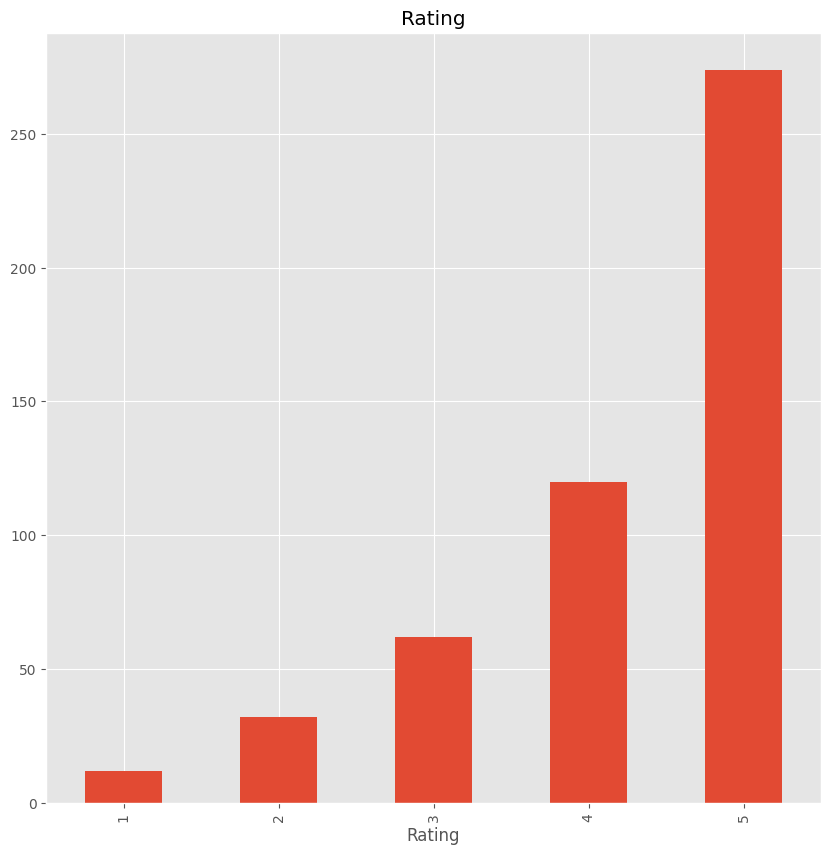

In [ ]:
dt["Rating"].value_counts().sort_index().plot(kind="bar",title="Rating",figsize=(10,10))

In [ ]:
dt.columns

Index(['id', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:

examples = dt["Review Text"][1]
examples

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [ ]:
token = nltk.word_tokenize(examples)
token[:10]

['Love', 'this', 'dress', '!', 'it', "'s", 'sooo', 'pretty', '.', 'i']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(token)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Love', 'VB'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('!', '.'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('.', '.'),
 ('i', 'NN'),
 ('happened', 'VBD'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('it', 'PRP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('store', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('glad', 'JJ'),
 ('i', 'NN'),
 ('did', 'VBD'),
 ('bc', 'NN'),
 ('i', 'NN'),
 ('never', 'RB'),
 ('would', 'MD'),
 ('have', 'VB'),
 ('ordered', 'VBN'),
 ('it', 'PRP'),
 ('online', 'PRP'),
 ('bc', 'VBZ'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('petite', 'JJ'),
 ('.', '.'),
 ('i', 'VB'),
 ('bought', 'VBD'),
 ('a', 'DT'),
 ('petite', 'NN'),
 ('and', 'CC'),
 ('am', 'VBP'),
 ('5', 'CD'),
 ("'", 'POS'),
 ('8', 'CD'),
 ("''", "''"),
 ('.', '.'),
 ('i', 'VB'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('length', 'NN'),
 ('on', 'IN'),
 ('me-', 'JJ'),
 ('hits', 'NNS'),
 ('just', 'RB'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('below', 'IN'),
 ('the', 'DT'),
 ('knee', 'NN'),
 ('.', '.'

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

ent = nltk.chunk.ne_chunk(tagged)
ent.pprint()

(S
  Love/VB
  this/DT
  dress/NN
  !/.
  it/PRP
  's/VBZ
  sooo/JJ
  pretty/RB
  ./.
  i/NN
  happened/VBD
  to/TO
  find/VB
  it/PRP
  in/IN
  a/DT
  store/NN
  ,/,
  and/CC
  i/JJ
  'm/VBP
  glad/JJ
  i/NN
  did/VBD
  bc/NN
  i/NN
  never/RB
  would/MD
  have/VB
  ordered/VBN
  it/PRP
  online/PRP
  bc/VBZ
  it/PRP
  's/VBZ
  petite/JJ
  ./.
  i/VB
  bought/VBD
  a/DT
  petite/NN
  and/CC
  am/VBP
  5/CD
  '/POS
  8/CD
  ''/''
  ./.
  i/VB
  love/VBP
  the/DT
  length/NN
  on/IN
  me-/JJ
  hits/NNS
  just/RB
  a/DT
  little/JJ
  below/IN
  the/DT
  knee/NN
  ./.
  would/MD
  definitely/RB
  be/VB
  a/DT
  true/JJ
  midi/NN
  on/IN
  someone/NN
  who/WP
  is/VBZ
  truly/RB
  petite/JJ
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print(examples)
sia.polarity_scores("examples")
dt.dtypes

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


id                          int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
res = {}
for i,row in tqdm(dt.iterrows(),total=len(dt)):
    text = row["Review Text"]
    id = row["id"]
    # Handle NaN values by converting them to empty strings
    if pd.isna(text):
        text = ""
    res[id] =sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vedor = pd.DataFrame(res).T
vedor

,neg,neu,pos,compound
0,0.000,0.272,0.728,0.8932
1,0.000,0.664,0.336,0.9729
2,0.027,0.792,0.181,0.9427
3,0.226,0.340,0.434,0.5727
4,0.000,0.700,0.300,0.9291
...,...,...,...,...
495,0.042,0.818,0.140,0.8619
496,0.000,0.588,0.412,0.9911
497,0.000,0.466,0.534,0.9437
498,0.000,0.858,0.142,0.5106


In [ ]:
vedor = vedor.reset_index().rename(columns={"index":"id"})

In [ ]:
vedor = vedor.merge(dt,how="left")

In [ ]:
vedor

,id,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.000,0.272,0.728,0.8932,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.000,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.226,0.340,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.000,0.700,0.300,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.042,0.818,0.140,0.8619,833,53,Still love it even if...,...there's enough room for a small family to l...,4,1,0,General,Tops,Blouses
496,496,0.000,0.588,0.412,0.9911,850,41,Pretty spring flowers,This top is so pretty and feminine. the differ...,5,1,1,General Petite,Tops,Blouses
497,497,0.000,0.466,0.534,0.9437,1078,49,NaN,"Very cute, very comfortable. for me aesthetics...",5,1,2,General,Dresses,Dresses
498,498,0.000,0.858,0.142,0.5106,850,33,Boxy,Cropped and wide- would look cuter on someone ...,3,0,0,General Petite,Tops,Blouses


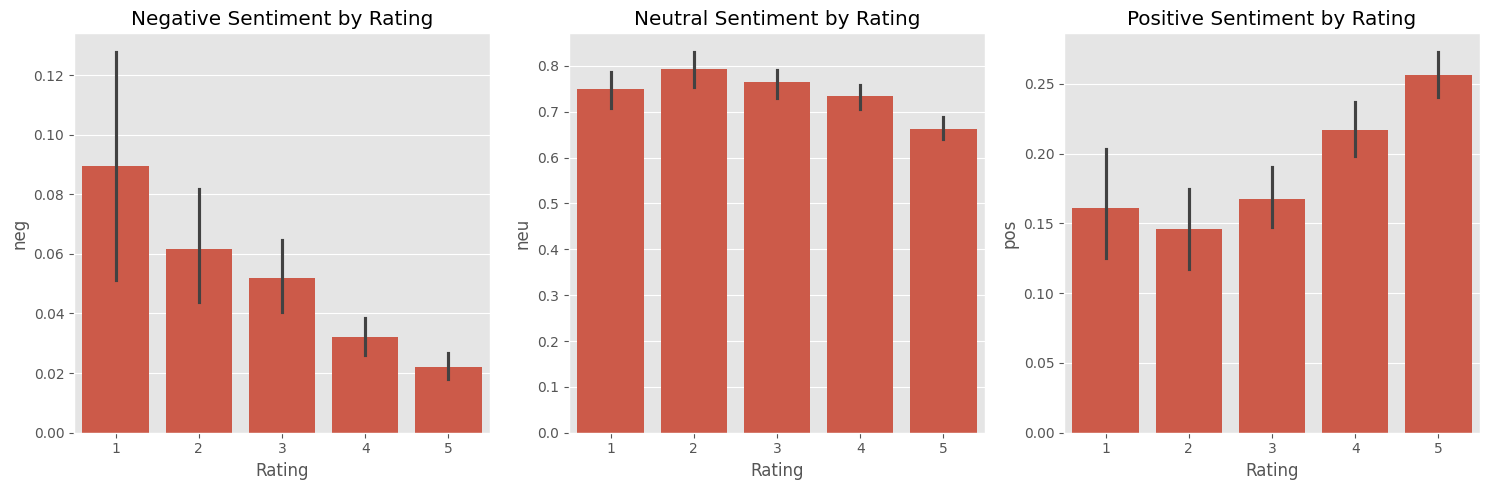

In [ ]:
# Plotting
fig, axn = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=vedor,y="neg",x="Rating",ax=axn[0])
axn[0].set_title("Negative Sentiment by Rating")
sns.barplot(data=vedor, y="neu", x="Rating", ax=axn[1])
axn[1].set_title('Neutral Sentiment by Rating')
sns.barplot(data=vedor, y="pos", x="Rating", ax=axn[2])
axn[2].set_title('Positive Sentiment by Rating')

plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
